# James Lloyd - Exploratory Data analysis

#### Reading in credit fraud data
#### Data obtained from https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#### Note, matplotlib inline allows plots to be displayed in jupyter notebooks

In [3]:
df = pd.read_csv ('../data/raw/creditcard.csv')

In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Note: Time—Number of seconds elapsed between this transaction and the first transaction in the dataset

### It's better to use .sample() instead of .head() apparently

In [6]:
df.sample (5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
105365,69486.0,1.451080,-0.546300,-0.300396,-1.224879,0.083158,0.723790,-0.679955,0.130937,-1.023204,...,0.117780,0.306568,-0.247354,-1.662263,0.646086,-0.090532,0.018633,-0.014168,10.00,0
127735,78445.0,-2.721134,0.964811,-1.241675,-0.855454,2.096008,4.089153,-2.571892,-3.924596,-1.034008,...,-2.954095,0.013843,1.199119,0.950579,0.060062,0.099474,0.262051,-0.074251,29.99,0
145815,87209.0,1.995015,-0.136854,-0.700744,1.339728,0.141749,0.322486,-0.228162,0.023713,1.164500,...,-0.579671,-1.333333,0.306777,-1.132687,-0.176192,-1.039223,0.059782,-0.039761,9.99,0
68844,53164.0,-0.796151,0.587162,2.568008,0.643692,-0.463877,0.064910,-0.042608,0.282759,0.084233,...,0.112664,0.384286,-0.142595,0.523973,-0.190216,-0.497931,0.022494,0.151171,9.99,0
50431,44488.0,-1.892197,0.231117,0.399609,-2.701506,-1.407059,0.618327,-1.499345,1.645816,-0.043078,...,-0.166057,-0.330864,-0.181736,-1.202506,-0.048808,-0.797278,-0.392156,-0.139117,33.00,0


In [7]:
df.describe ()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Check for the proportion of missing values . . . appears to be zero

In [23]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data#.loc[missing_data['Missing Percent'] > 10][:10]

,Total,Missing Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


In [24]:
import pandas_profiling

### Code doesn't finish running

In [ ]:
# profile = df.profile_report(title='Pandas Profiling Report for Credit Card Fraud')
# profile.to_file (output_file="fifa_pandas_profiling.html")

In [8]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

#### Found about 1000 duplicates—decision made to remove them

In [9]:
print (df.shape)
print (df.drop_duplicates().shape)

(284807, 31)
(283726, 31)


In [4]:
df = df.drop_duplicates()

### All variables v1 to v28 are 0 centred. Also disguised in various ways—further exploration not necessarily useful

#### Time seems to be bimodal, and amount severely positively skewed

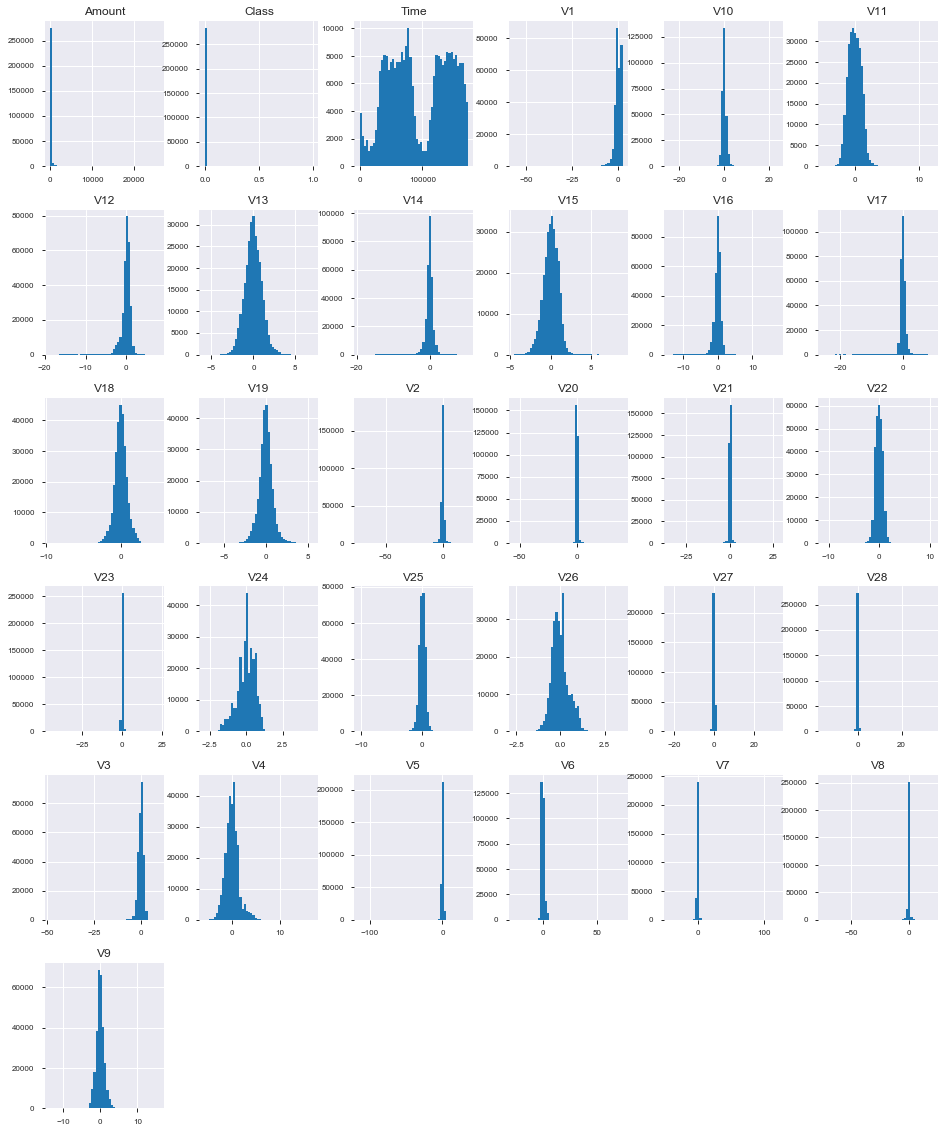

In [ ]:
df.hist (figsize = (16,20), bins = 50, xlabelsize=8, ylabelsize=8);

### Exploring Amount

In [11]:
df ['Amount'].describe ()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

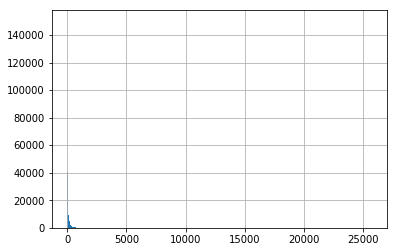

In [12]:
df ['Amount'].hist (bins = 1000)

In [13]:
df [df ['Amount'] > 2000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
1388,1077.0,-3.936794,-3.670519,-1.453820,2.299750,-9.749440,6.456410,10.784088,-2.160016,-0.238116,...,-0.979104,0.957186,2.441960,0.250607,0.300908,1.157867,1.624284,-1.638647,2452.03,0
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0
2178,1698.0,-5.849226,-11.754975,-3.333303,3.673246,-4.459583,0.659098,4.527224,-0.985512,0.237794,...,2.160870,-1.992179,-3.240351,0.609619,-0.985548,0.089693,-0.713355,0.653060,3669.00,0
2453,2019.0,-3.687481,-8.746635,-2.057885,1.858936,-3.353004,1.580542,2.399114,-0.318630,-1.045750,...,1.230193,-1.573274,-2.122351,-0.141325,-0.838373,0.251148,-0.440547,0.445717,2540.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281375,170137.0,-1.965632,1.301630,-4.354657,2.757797,-13.289029,10.085792,15.364280,-4.554727,-2.568326,...,0.131940,-0.407096,-0.525327,1.004851,-0.226852,-0.179945,2.326879,-1.326722,3100.00,0
281611,170302.0,-5.034683,-12.155822,-4.527769,2.219104,-4.375383,0.380424,4.385223,-1.140605,0.892836,...,2.058558,-2.221445,-2.833333,0.145944,-1.957437,-0.052993,-0.720871,0.593201,3670.00,0
283315,171514.0,-2.740984,-2.586374,-5.803083,-0.812563,-10.954787,6.380773,13.992227,-2.435900,-2.882009,...,-0.236493,0.416872,1.669461,-0.860928,1.011840,1.058176,0.774090,-0.898281,2992.05,0
283395,171560.0,-6.519366,-10.723215,-4.631726,0.074792,-9.973646,7.975968,12.793781,-0.541910,-2.328088,...,2.215869,-0.362451,9.113598,-1.460900,0.602284,-0.693933,-1.111301,0.444162,3820.86,0


### Is there a cut off we can use to filter amount, e.g. df = df [df.Amount <= 1000]

## Exploring class distribution

In [14]:
df.Class.value_counts ()

0    283253
1       473
Name: Class, dtype: int64

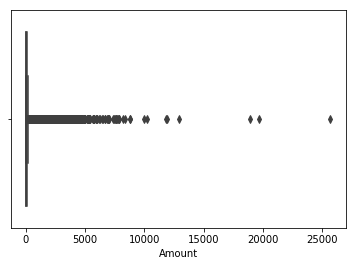

In [15]:
sns.boxplot (df [df.Class == 0].Amount)

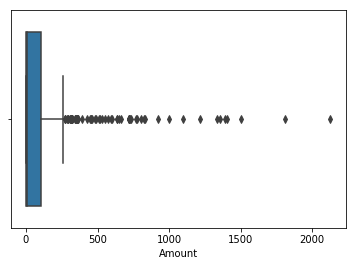

In [16]:
sns.boxplot (df [df.Class == 1].Amount)

#### On average, fraudulent transactions are of a higher value. No fraudelant transaction over 2500 was witnessed. Filter?

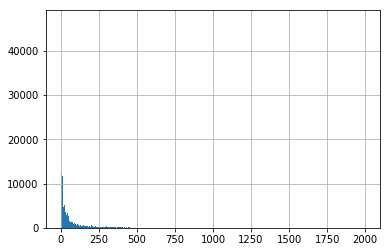

In [8]:
df[df ['Amount'] < 2000].Amount.hist (bins = 1000);

### Corelations between V's and Class

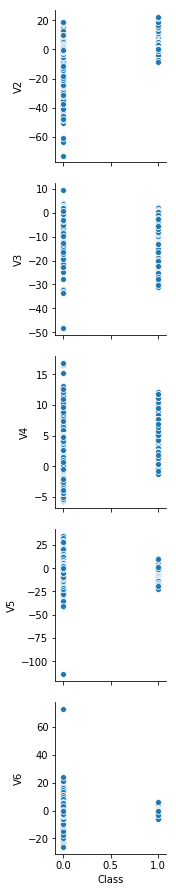

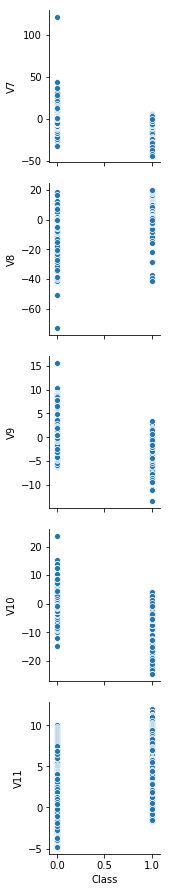

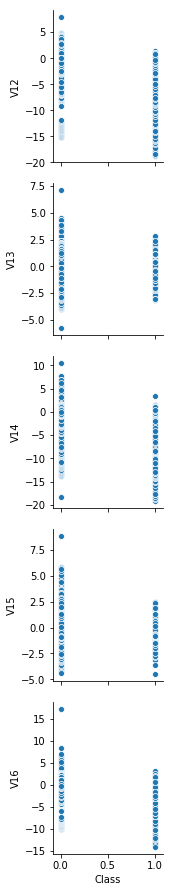

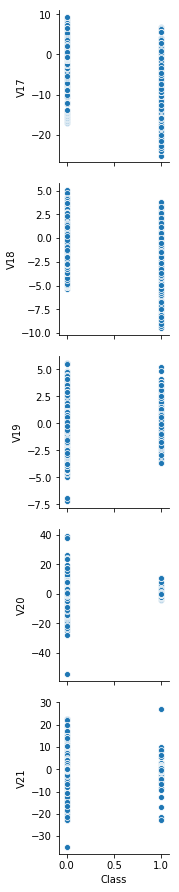

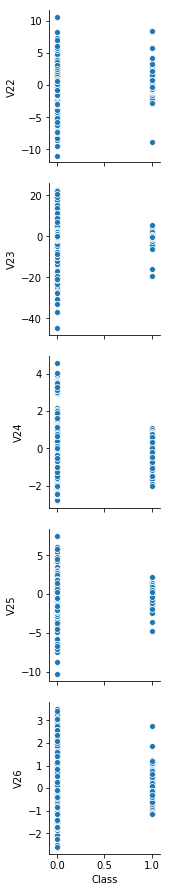

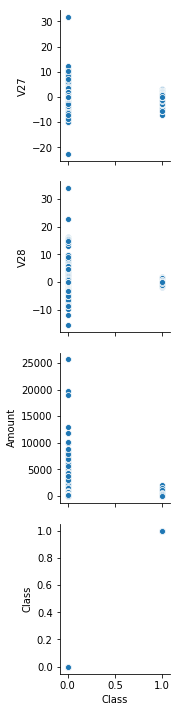

In [19]:
for i in range (2,30, 5):
    sns.pairplot (df, x_vars=['Class'],y_vars = df.columns [i:i+5])

In [17]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Clearly there are some outliers. What to do with them?

In [10]:
df.corr() [df.corr () > 0.5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021
